In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
 df = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
1    165
0    138
Name: count, dtype: int64


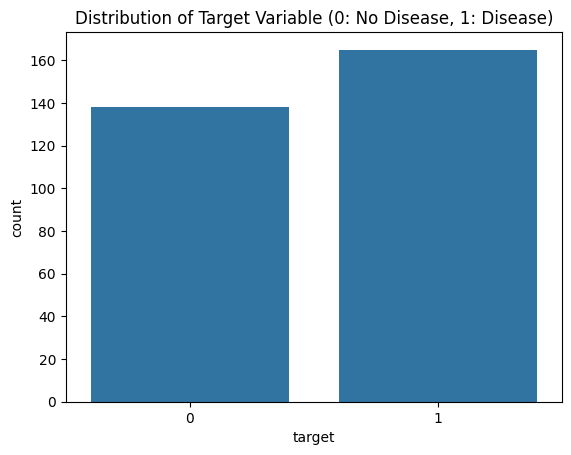

In [ ]:
target_counts = df['target'].value_counts()
print(target_counts)
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: No Disease, 1: Disease)')
plt.show()

In [ ]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


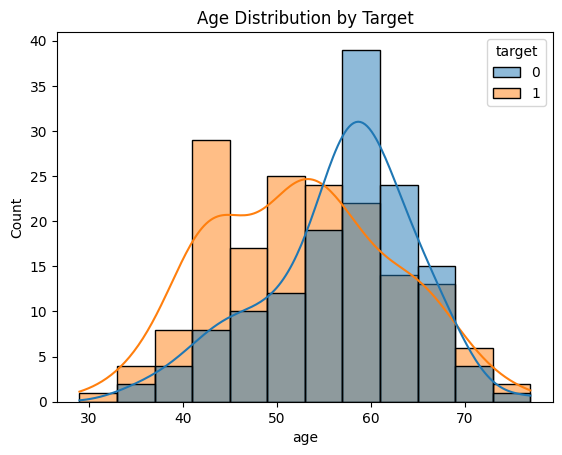

In [ ]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution by Target')
plt.show()

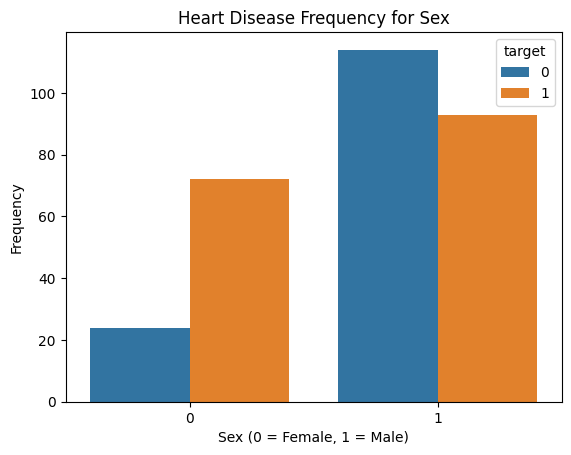

In [ ]:
sns.countplot(data=df, x='sex', hue='target')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

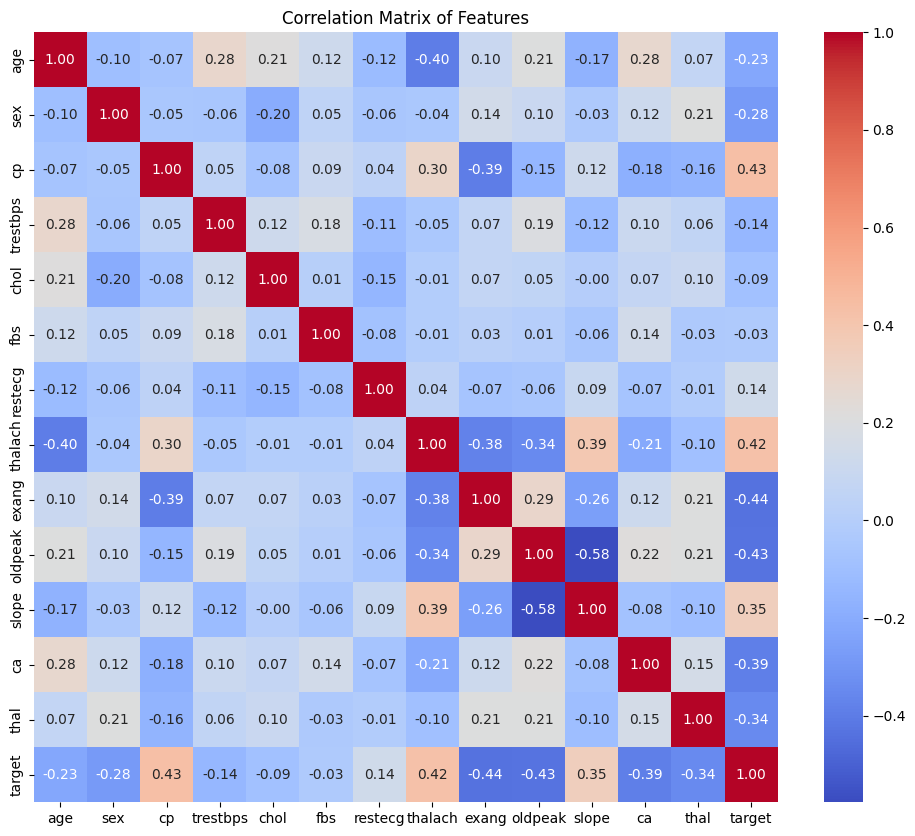

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
# Logistic Regression with GridSearchCV
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])
param_grid_lr = {'clf__C': [0.01, 0.1, 1, 10], 'clf__solver': ['liblinear', 'lbfgs']}
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy')
gs_lr.fit(X_train, Y_train)
y_pred_lr = gs_lr.predict(X_test)
print("\nLogistic Regression")
print("Best Params:", gs_lr.best_params_)
print("Accuracy:", accuracy_score(Y_test, y_pred_lr))
print("Classification Report:\n", classification_report(Y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_lr))


Logistic Regression
Best Params: {'clf__C': 0.01, 'clf__solver': 'liblinear'}
Accuracy: 0.8032786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:
 [[22  6]
 [ 6 27]]


In [ ]:
# KNN with GridSearchCV
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])
param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}
gs_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='accuracy')
gs_knn.fit(X_train, Y_train)
y_pred_knn = gs_knn.predict(X_test)
print("\nK-Nearest Neighbors")
print("Best Params:", gs_knn.best_params_)
print("Accuracy:", accuracy_score(Y_test, y_pred_knn))
print("Classification Report:\n", classification_report(Y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_knn))


K-Nearest Neighbors
Best Params: {'clf__metric': 'manhattan', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}
Accuracy: 0.7377049180327869
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72        28
           1       0.77      0.73      0.75        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Confusion Matrix:
 [[21  7]
 [ 9 24]]


In [ ]:
# SVM with GridSearchCV
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True))
])
param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}
gs_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
gs_svm.fit(X_train, Y_train)
y_pred_svm = gs_svm.predict(X_test)
print("\nSupport Vector Machine")
print("Best Params:", gs_svm.best_params_)
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("Classification Report:\n", classification_report(Y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))


Support Vector Machine
Best Params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Accuracy: 0.8032786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:
 [[22  6]
 [ 6 27]]


In [ ]:
# Random Forest with GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
gs_rf.fit(X_train, Y_train)
y_pred_rf = gs_rf.predict(X_test)
print("\nRandom Forest")
print("Best Params:", gs_rf.best_params_)
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("Classification Report:\n", classification_report(Y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))



Random Forest
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Confusion Matrix:
 [[22  6]
 [ 7 26]]


In [ ]:
# XGBoost with GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
gs_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb, cv=5, scoring='accuracy'
)
gs_xgb.fit(X_train, Y_train)
y_pred_xgb = gs_xgb.predict(X_test)
print("\nXGBoost")
print("Best Params:", gs_xgb.best_params_)
print("Accuracy:", accuracy_score(Y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(Y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.7704918032786885
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Confusion Matrix:
 [[21  7]
 [ 7 26]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import pandas as pd

# Create summary table
summary_data = {
    "Model": [
        "Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Random Forest",
        "XGBoost"],
        "Test Accuracy": [
        accuracy_score(Y_test, y_pred_lr),
        accuracy_score(Y_test, y_pred_knn),
        accuracy_score(Y_test, y_pred_svm),
        accuracy_score(Y_test, y_pred_rf),
        accuracy_score(Y_test, y_pred_xgb)]}

results_df = pd.DataFrame(summary_data)
print(results_df)


                    Model  Test Accuracy
0     Logistic Regression       0.803279
1     K-Nearest Neighbors       0.737705
2  Support Vector Machine       0.803279
3           Random Forest       0.786885
4                 XGBoost       0.770492


In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance'),
    "SVM": SVC(C=10, kernel='rbf', gamma='scale', probability=True),
    "XGBoost": XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression CV Accuracy: 0.8315 ± 0.0513
Random Forest CV Accuracy: 0.8382 ± 0.0288
KNN CV Accuracy: 0.6702 ± 0.0484
SVM CV Accuracy: 0.6998 ± 0.0202


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost CV Accuracy: 0.7821 ± 0.0425


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:01:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


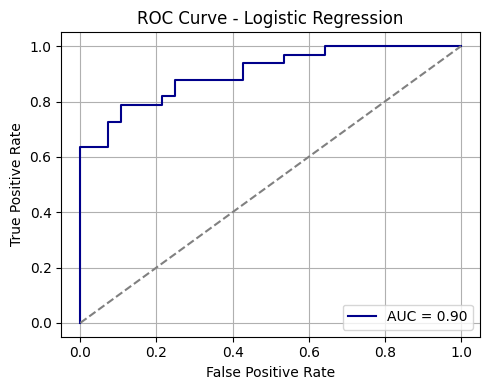

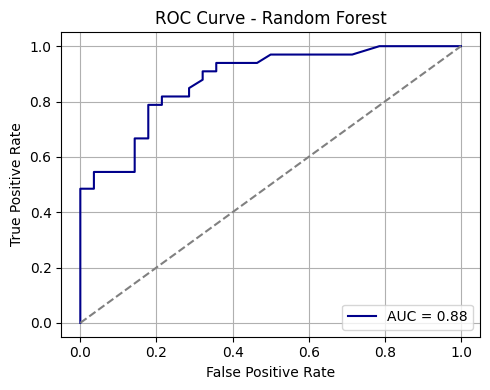

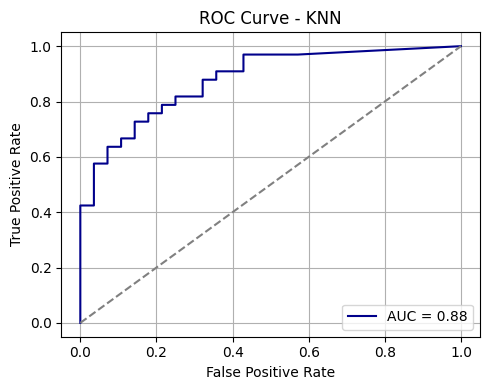

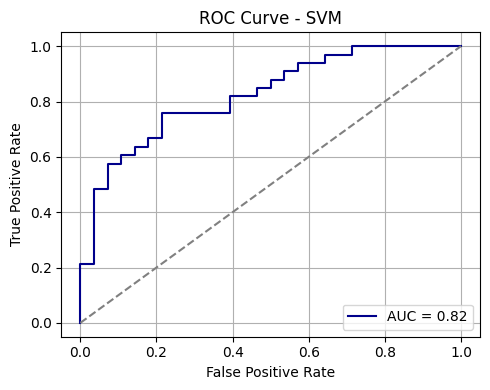

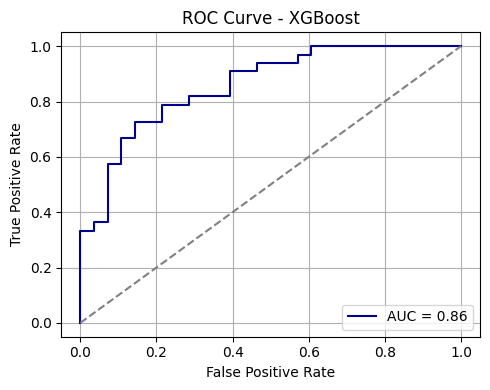

In [ ]:
models = {
    "Logistic Regression": Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000))]),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance'))]),
    "SVM": Pipeline([('scaler', StandardScaler()), ('clf', SVC(C=10, kernel='rbf', gamma='scale', probability=True))]),
    "XGBoost": XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss')}
# Fit all models
for name, model in models.items():
    model.fit(X_train, Y_train)  # Fit each model before using it for prediction


for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_proba)
        auc = roc_auc_score(Y_test, y_proba)

        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, color='darkblue', label=f"AUC = {auc:.2f}")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

        plt.title(f"ROC Curve - {name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
input_data = (30,1,0,100,150,0,0,160,7,4.2,0,2,4)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Store the fitted models
models = {
    "Logistic Regression": Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000))]),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance'))]),
    "SVM": Pipeline([('scaler', StandardScaler()), ('clf', SVC(C=10, kernel='rbf', gamma='scale', probability=True))]),
    "XGBoost": XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss')}



In [ ]:
# Fit all models
for name, model in models.items():
    model.fit(X_train, Y_train)  # Fit each model before using it for prediction

metrics = []

for name, y_pred, model in zip(
    ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost'],
    [y_pred_lr, y_pred_knn, y_pred_svm, y_pred_rf, y_pred_xgb],
    [models['Logistic Regression'], models['KNN'], models['SVM'], models['Random Forest'], models['XGBoost']] ):
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, 'predict_proba') else 0

    metrics.append([name, accuracy_score(Y_test, y_pred), precision, recall, f1])

results_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.803279   0.818182  0.818182  0.818182
1                  KNN  0.737705   0.774194  0.727273  0.750000
2                  SVM  0.803279   0.818182  0.818182  0.818182
3        Random Forest  0.786885   0.812500  0.787879  0.800000
4              XGBoost  0.770492   0.787879  0.787879  0.787879


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:05:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 📊  Multi-Metric Comparison

This radar chart visualizes the performance of each model across five key evaluation metrics:

- **Accuracy**: Overall correct predictions
- **Precision**: How many predicted positives are actually positive
- **Recall**: How many actual positives were identified
- **F1-Score**: Balance of precision and recall
- **ROC-AUC**: How well the model separates the classes

> This multi-metric view helps in identifying the best all-rounder model, not just the one with highest accuracy.

- **Logistic Regression and SVM** perform consistently strong across all metrics.
- **Random Forest and XGBoost** are close competitors with high ROC-AUC and F1-scores.
- **KNN** lags a bit in recall, which is critical in heart disease prediction.
